# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seanendicott/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
print(api_key)

337e4f0a589840989f58cf07629b6522


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_headlines['articles'][0]


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_headlines['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,2022-03-22,March 22 (Reuters) - Bitcoin just isn't anonym...,0.6369,0.171,0.000,0.829
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-22,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.111790,0.065350,0.038800,0.895900
std,0.416309,0.052391,0.060936,0.074144
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.032000,0.000000,0.000000,0.852500
50%,0.223100,0.071500,0.000000,0.889000
75%,0.430825,0.092750,0.052000,0.952500
max,0.636900,0.171000,0.187000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.233365,0.085400,0.024600,0.889950
std,0.428281,0.092623,0.037614,0.104349
min,-0.526700,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.200950,0.068500,0.000000,0.910500
75%,0.528675,0.141500,0.048500,1.000000
max,0.867600,0.270000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score of 0.075050

Q: Which coin had the highest compound score?

A: Ethereum had the higher compound score of 0.834000

Q. Which coin had the highest positive score?

A: Ethereum had the higher positive score of 0.249000	

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(sw)
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

{'myself', 'been', 'am', 'down', 'too', 'do', 'itself', 'a', 'yourself', 'ours', 'are', 'didn', 'as', "wasn't", 'nor', "haven't", 'she', 'should', "doesn't", 'no', 'ain', "it's", 'ma', 'couldn', 'so', 'his', "won't", 'once', "aren't", 'off', 'don', "you've", 't', 'few', "should've", 'isn', 'under', 'has', 'needn', 'same', 'but', 'why', 'in', 'll', 'during', "she's", 'm', "isn't", 'd', 'while', 'wasn', 'after', "you'd", "that'll", 'if', 'were', 'themselves', 'up', 'these', 'who', 'further', 'between', "weren't", 'weren', 'each', 'be', "didn't", "wouldn't", 'your', 'him', 'me', 'have', 'that', 'whom', 'does', 'you', 'won', 'because', 'just', 'again', 'i', 'hadn', 'haven', 'than', 'not', 'their', 'had', 'other', 'ourselves', 'through', 'until', 'against', 'on', 'aren', "shan't", 'hers', 'how', 'will', 'hasn', 'for', 'mightn', 'being', 've', 'which', 'what', 'then', "you'll", 'theirs', 'herself', 'its', 'to', "don't", 'and', 'very', 'now', 'y', "mightn't", 'wouldn', 'by', 'of', "mustn't", 

In [23]:
btc_str_text = str(bitcoin_df['text'])

btc_text = bitcoin_df['text']

In [24]:
eth_text = ethereum_df['text']

In [25]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return output


In [26]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = tokenizer(btc_text)


TypeError: expected string or bytes-like object

In [27]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = tokenizer(ethereum_df['text'])

TypeError: expected string or bytes-like object

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [29]:
# Generate the Bitcoin N-grams where N=2
word_counts = Counter(btc_text)
bigram_counts = Counter(ngrams(btc_text, n=2))

In [30]:
# Generate the Ethereum N-grams where N=2
word_counts = Counter(eth_text)
bigram_counts = Counter(ngrams(eth_text, n=2))

In [31]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = bitcoin_df['tokens'] 
btc_top_ten = token_count(btc_tokens, N=3)

KeyError: 'tokens'

In [33]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = ethereum_df['tokens']
eth_top_ten = token_count(eth_tokens, N=3)

KeyError: 'tokens'

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

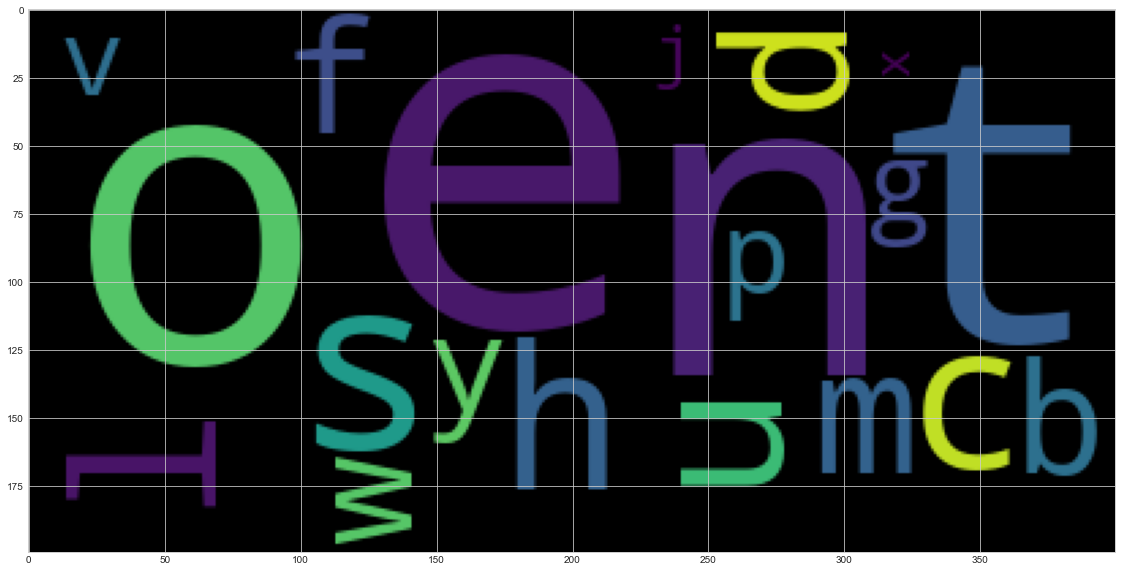

In [76]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_text)

wc = WordCloud().generate(big_string)
plt.imshow(wc)

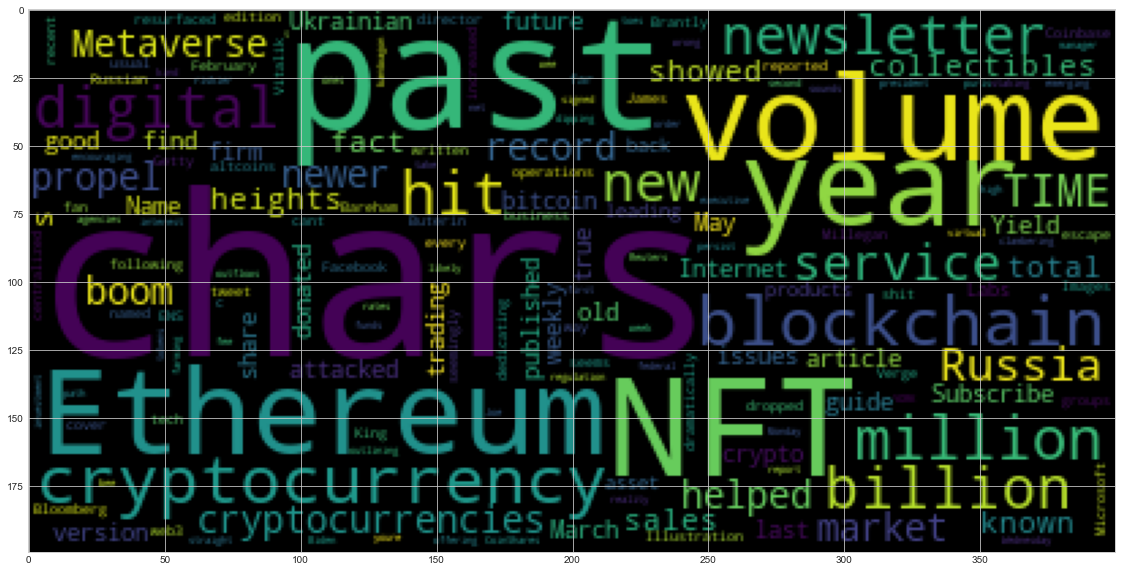

In [77]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_text)

wc = WordCloud(collocations=False).generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---